In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [42]:
df = pd.read_csv("/content/drive/MyDrive/Post Graduation/Machine Learning/Class Codes/ds/DS/winequality-red.csv")

In [43]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [44]:
df.shape

(1599, 12)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [46]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [47]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [48]:
# feature and target
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

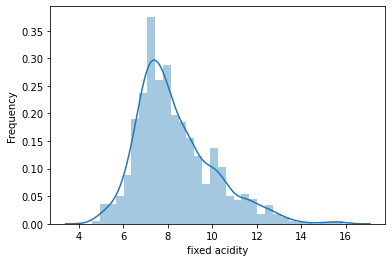

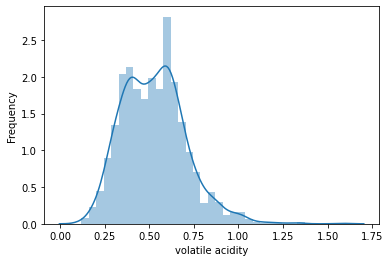

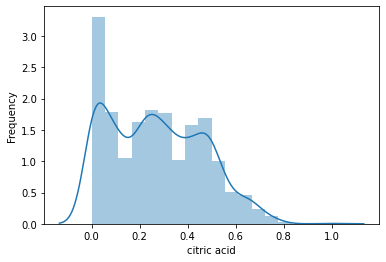

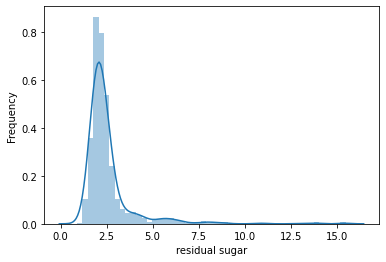

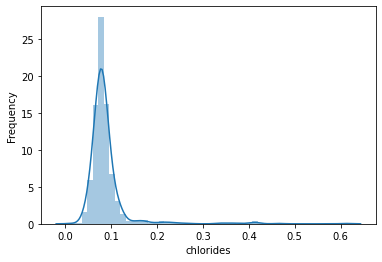

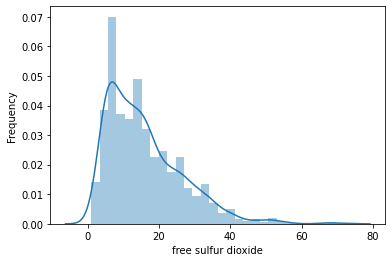

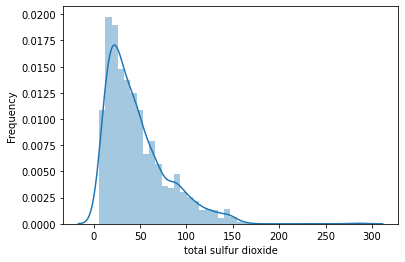

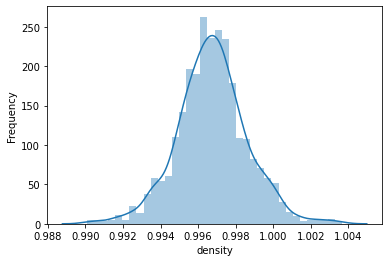

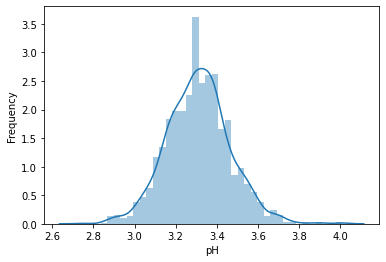

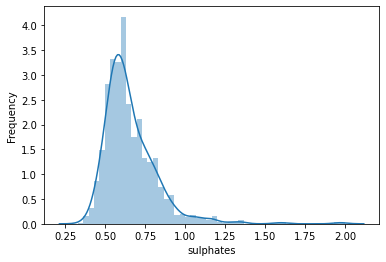

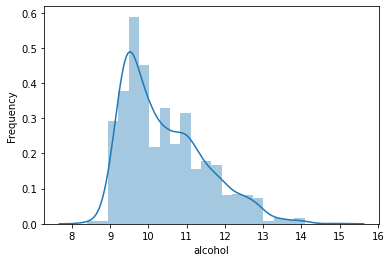

In [49]:
for col in X:
    plt.figure()
    sns.distplot(X[col])
    plt.ylabel("Frequency")
    plt.show()
    


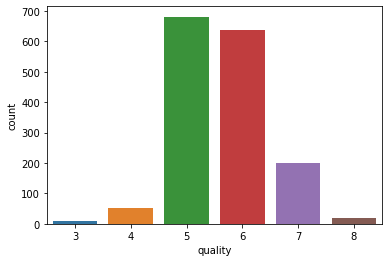

In [50]:
# target count
plt.figure()
sns.countplot(y)
plt.show()

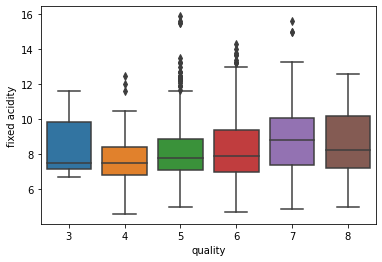

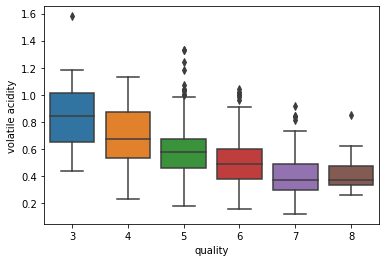

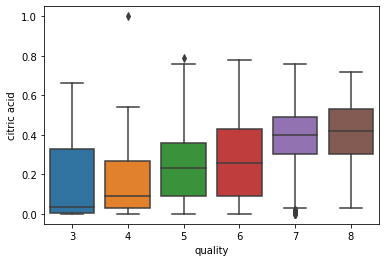

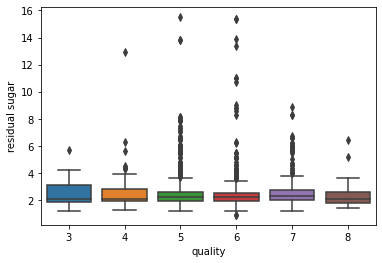

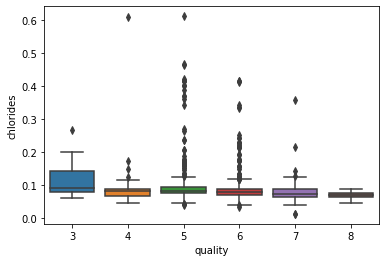

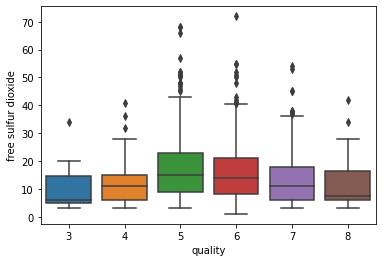

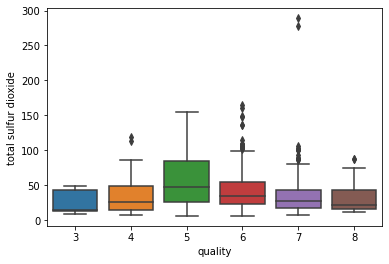

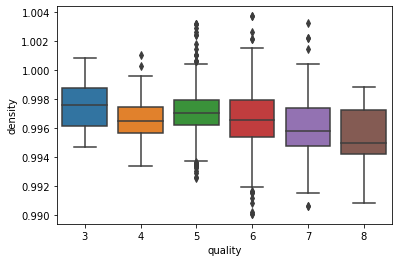

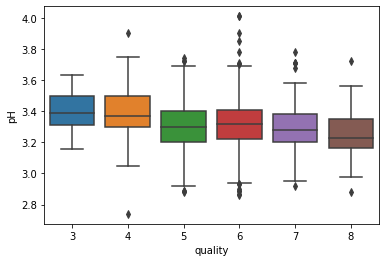

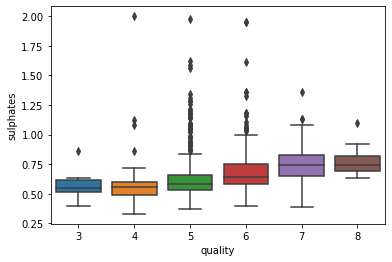

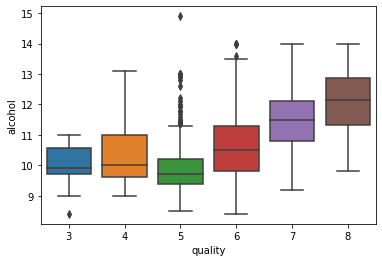

In [51]:
# feature target relationship and outliers
for col in X:
    plt.figure()
    sns.boxplot(data=df, x="quality", y=col)
    plt.show()

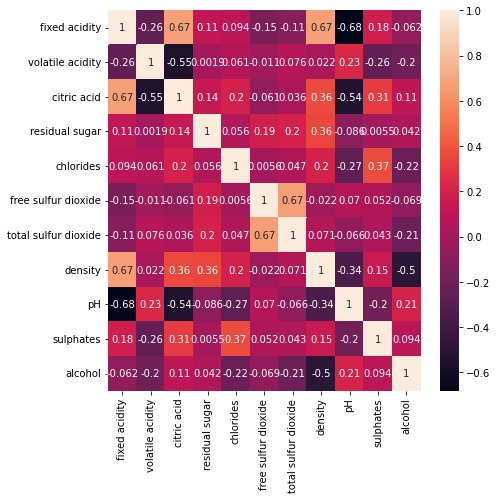

In [52]:
# multi-colinearity
plt.figure(figsize=(7,7))
sns.heatmap(X.corr(), annot=True)
plt.show()

In [53]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [54]:
# model
# gini index
# model = DecisionTreeClassifier()
# model.fit(X_train,y_train)

In [55]:
# train score
# model.score(X_train,y_train)

In [56]:
# predict
# y_pred = model.predict(X_test)
# print(classification_report(y_test,y_pred))

In [57]:
# entropy

# model2 = DecisionTreeClassifier(criterion="entropy")
# model2.fit(X_train,y_train)

In [58]:
# predict
# y_pred = model2.predict(X_test)
# print(classification_report(y_test,y_pred))

In [59]:
# depth
# model.get_depth()

In [60]:
# prunning
# max depth

# model3 = DecisionTreeClassifier(max_depth=8)
# model3.fit(X_train,y_train)

In [61]:
# predict
# y_pred = model3.predict(X_test)
# print(classification_report(y_test,y_pred))

In [62]:
# min samples leaf
# model4 = DecisionTreeClassifier(min_samples_leaf=15)
# model4.fit(X_train,y_train)

In [63]:
# predict
# y_pred = model4.predict(X_test)
# print(classification_report(y_test,y_pred))

In [64]:
# Random over sampling
from imblearn.over_sampling import RandomOverSampler

In [65]:
rs = RandomOverSampler(random_state=1)
X_train_rs, y_train_rs = rs.fit_resample(X_train,y_train)

In [66]:
y_train_rs.value_counts()

5    474
6    474
7    474
8    474
4    474
3    474
Name: quality, dtype: int64

In [67]:
model5 = DecisionTreeClassifier()
model5.fit(X_train_rs, y_train_rs)

DecisionTreeClassifier()

In [68]:
y_pred = model5.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.25      0.14      0.18        21
           5       0.70      0.75      0.72       207
           6       0.63      0.58      0.60       195
           7       0.45      0.46      0.46        52
           8       0.14      0.33      0.20         3

    accuracy                           0.62       480
   macro avg       0.36      0.38      0.36       480
weighted avg       0.62      0.62      0.62       480



In [69]:
model5.get_depth()

19

In [70]:
# max_depth
model6 = DecisionTreeClassifier(max_depth=15)
model6.fit(X_train_rs,y_train_rs)

DecisionTreeClassifier(max_depth=15)

In [71]:
y_pred = model6.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.10      0.05      0.06        21
           5       0.68      0.69      0.68       207
           6       0.58      0.60      0.59       195
           7       0.48      0.42      0.45        52
           8       0.14      0.33      0.20         3

    accuracy                           0.59       480
   macro avg       0.33      0.35      0.33       480
weighted avg       0.58      0.59      0.59       480



In [72]:
# min_samples_leaf
model7 = DecisionTreeClassifier(min_samples_leaf=3)
model7.fit(X_train_rs,y_train_rs)

DecisionTreeClassifier(min_samples_leaf=3)

In [73]:
y_pred = model7.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.29      0.19      0.23        21
           5       0.66      0.74      0.70       207
           6       0.62      0.50      0.55       195
           7       0.43      0.46      0.44        52
           8       0.09      0.33      0.14         3

    accuracy                           0.59       480
   macro avg       0.35      0.37      0.34       480
weighted avg       0.59      0.59      0.58       480



In [74]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

In [75]:
rf = RandomForestClassifier(n_estimators=75, max_depth=18, max_features=8)
rf.fit(X_train_rs, y_train_rs)

RandomForestClassifier(max_depth=18, max_features=8, n_estimators=75)

In [76]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.50      0.14      0.22        21
           5       0.72      0.82      0.76       207
           6       0.70      0.60      0.64       195
           7       0.53      0.60      0.56        52
           8       0.14      0.33      0.20         3

    accuracy                           0.67       480
   macro avg       0.43      0.41      0.40       480
weighted avg       0.67      0.67      0.66       480



In [77]:
# converting multi-class to binary-class

df = pd.read_csv("winequality-red.csv")

FileNotFoundError: ignored

In [ ]:
df.head()

In [ ]:
def multi_to_bin(n):
    if n >= 6:
        return 1
    else:
        return 0

In [ ]:
df["quality_bin"] = df["quality"].apply(multi_to_bin)

In [ ]:
df.head()

In [ ]:
df["quality_bin"].value_counts()

In [ ]:
# feature and target split
X = df.drop(["quality_bin","quality"], axis=1)
y = df["quality_bin"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
rf = RandomForestClassifier(n_estimators=75)
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))